In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, classification_report
import time



2: Read in the ‘winequality-white.csv’ file as a pandas data frame.

In [3]:
df = pd.read_csv('Dataset/winequality-white.csv',sep = ';')

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
# Look at the dataset
df.head()

In [ ]:
# Check for NA
df.info()


In [ ]:
# look at out target Value
df['quality'].value_counts()

3. The target will be the ‘quality’ column which represents rating of wine and
ranges from 3 to 8. You will need to convert it into a two-category variable
consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector
should have 0s (representing “bad” quality wine) and 1s (representing “good”
quality wine).

In [ ]:
df['quality'] = (df['quality'] > 5).astype(int)
df['quality'][:10]

In [ ]:
# Rename quality to y
df = df.rename(columns={'quality':'y'})

4. Use the techniques from the first recitation to summarize each of the variables in
the dataset in terms of mean, standard deviation, and quartiles.

In [ ]:
df.describe()

5. (Optional:) You may apply the data pre-processing steps of Exploratory Data
Analysis (EDA) that you learned in recitation 2.

In [ ]:
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(bins=50, figsize=(20,15));

In [ ]:

# Import Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (9, 9)

# Bar plot of grades
plt.bar(df['y'].value_counts().index, 
        df['y'].value_counts().values,
         fill = 'navy', edgecolor = 'k', width = 1)
plt.xlabel('y'); 
plt.ylabel('Count'); 
plt.title('Distribution of Wine Quality');
plt.xticks(list(range(0, 10)));

6) You need to identify and report the redundant features


7) Drop the redundant features and implement the steps up to 13 (you need to
perform grid search in step 10 just once). See whether dropping features
improves the performance measures (e.g., F1 score). If not then keep the features.
You need to understand that having highly correlated features will not contribute
towards meaningful distance calculation. Moreover, it will increase the timecomplexity. You will have to determine this experimentally. 

In [14]:
#Redundancy might be  giving in ph, fixed acitity, volatitle acidity, citric acid 
# MIGHht all be not informative(Similarity)

In [15]:
# Method 1: Look at the correlation
df.corr()['y'].abs().sort_values(ascending=False)

y                       1.000000
alcohol                 0.383280
density                 0.268696
volatile acidity        0.225440
chlorides               0.183939
total sulfur dioxide    0.170924
residual sugar          0.092756
fixed acidity           0.089749
pH                      0.083687
sulphates               0.051858
free sulfur dioxide     0.001278
citric acid             0.000700
Name: y, dtype: float64

KeyboardInterrupt: 

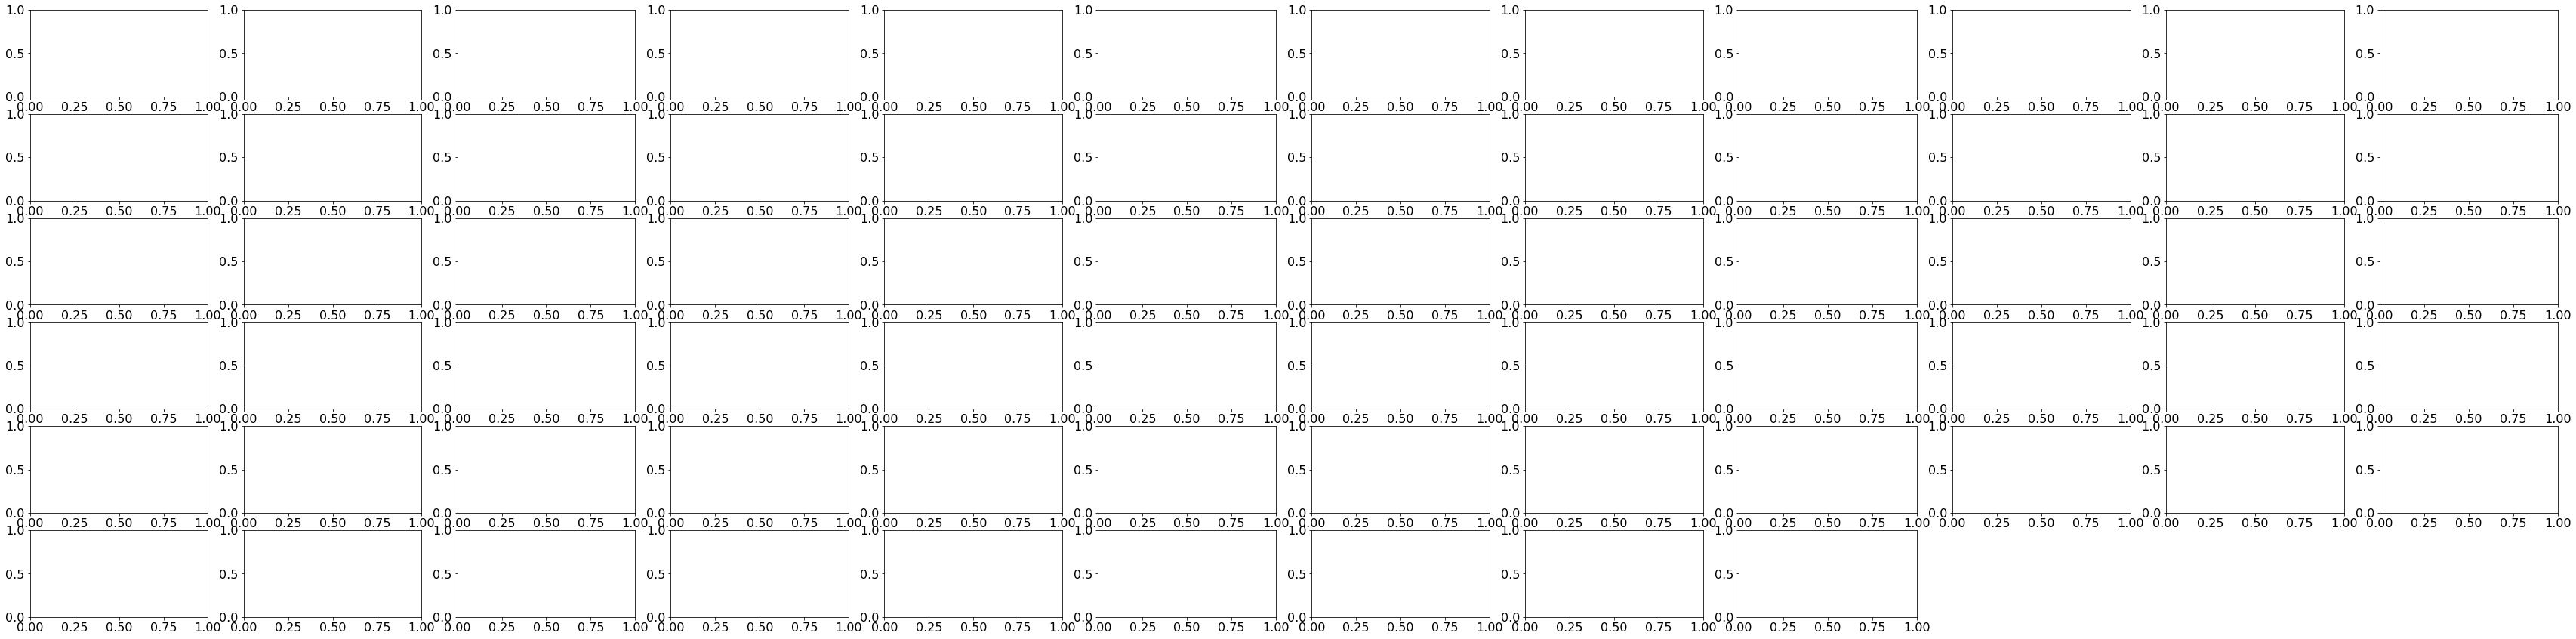

In [13]:
# Plot scatter matrix to visualize Correlation
# Takes a while
from pandas.plotting import scatter_matrix


attributes = df.columns

scatter_matrix(df[attributes], figsize=(60, 30));

In [16]:
y = df['y'] # Target vector
X =  df.drop(columns=['y'])#Design Matrix

In [17]:
## Method 2: 
## Mutual Information between a feature and target for all features
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mi_series = pd.Series(mutual_info)
mi_series.index = X.columns

mi_series.sort_values(ascending=False)


alcohol                 0.094088
density                 0.091076
citric acid             0.043057
total sulfur dioxide    0.041327
residual sugar          0.036806
chlorides               0.035554
free sulfur dioxide     0.034781
volatile acidity        0.028936
pH                      0.018677
fixed acidity           0.010133
sulphates               0.010026
dtype: float64

In [18]:
#Only feature with best MI 
from sklearn.feature_selection import SelectKBest
k_best_features = SelectKBest(mutual_info_classif, k=5).fit(X, y)
indxBest = X.columns[k_best_features.get_support()]
indxBest

Index(['residual sugar', 'chlorides', 'total sulfur dioxide', 'density',
       'alcohol'],
      dtype='object')

In [19]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'y'],
      dtype='object')

In [20]:
## Also why these for report:
## First Wine is acidic, SO fixed acitdity, PH and citric acid gives same thing. Hence, we only use a true scale of acidity
## (PH ) and drop all redundent features. 
## Secondly, Sulphates, Total sulphur dioxide and free sulphur dioxide all are same. Take sulphates SO₄²-
## Thirdly, We can also observe residual sugar and density has strong correlation. COv between those two might
## be non - Zero and it makes sense. (Adding sugar increases density,SO more residual sugar more density)


# Feature Selection using Forward search( Since #features is only 11)
# Complexity(Naive Way):O(N^2) i.e run KNN for features squares times
#2^n  possible models to check 
testX = X
y = y
testX

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [21]:
##Using Cross validation to test whats the score with all features included 
maxScore = 0.0
train_accuracy = 0.0
validation_accuracy = 0.0
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(testX, y)     
train_accuracy = knn.score(testX, y)    
scores = cross_val_score(knn, testX, y, scoring='accuracy', cv=5) 
validation_accuracy = scores.mean()
maxScore = validation_accuracy
print(maxScore)

0.6453826270038148


In [20]:
## Use backward search(Warping feature selection) to test all possible feature combination
## to run KNN for 2^11 times, as each run takes few seconds
import pdb
start = time.process_time() 
k = 1
for j in range(len(X.columns)):
    #pdb.set_trace() #for debugging 
    index = -1
    for i,cols in enumerate(X.columns):
        #pdb.set_trace()
        fs_df = X    
        fs_df = fs_df.drop(columns = fs_df.columns[i])
        
        knn = KNeighborsClassifier(n_neighbors=k)   
        knn.fit(fs_df, y)
        train_accuracy = knn.score(fs_df, y)  
        scores = cross_val_score(knn, fs_df, y, scoring='accuracy', cv=5)   
        validation_accuracy = scores.mean()
        
        if validation_accuracy > maxScore:
            maxScore = validation_accuracy
            index = i
    if(index != -1):
        print('This is Dropped:',X.columns[index])
        X = X.drop(columns = X.columns[index])
    print(X.columns) 
    print('\n','='*30)
end = time.process_time()
print(end - start,'s')

This is Dropped: total sulfur dioxide
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

This is Dropped: fixed acidity
Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

This is Dropped: free sulfur dioxide
Index(['volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
       'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

This is Dropped: chlorides
Index(['volatile acidity', 'citric acid', 'residual sugar', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

This is Dropped: citric acid
Index(['volatile acidity', 'residual sugar', 'density', 'pH', 'sulphates',
       'alcohol'],
      dtype='object')

This is Dropped: residual sugar
Index(['volatile acidity', 'density', 'pH', 'sulphat

In [22]:
print(maxScore)
X

0.6453826270038148


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [23]:
## Best possible Feature as calculated by our Backward search feature selection algorithm
best_features = ['volatile acidity', 'density', 'pH', 'sulphates', 'alcohol']
best_df = df[best_features]
best_df

,volatile acidity,density,pH,sulphates,alcohol
0,0.27,1.00100,3.00,0.45,8.8
1,0.30,0.99400,3.30,0.49,9.5
2,0.28,0.99510,3.26,0.44,10.1
3,0.23,0.99560,3.19,0.40,9.9
4,0.23,0.99560,3.19,0.40,9.9
...,...,...,...,...,...
4893,0.21,0.99114,3.27,0.50,11.2
4894,0.32,0.99490,3.15,0.46,9.6
4895,0.24,0.99254,2.99,0.46,9.4
4896,0.29,0.98869,3.34,0.38,12.8


8.Partition the dataset into train and test set (80%-20%). It should return two feature matrices X_train, X_test; and two target vectors y_train & y_test.

In [24]:
## USing best_df for training 
X_train, X_test, y_train, y_test = train_test_split(best_df, y, test_size=0.2, random_state=0)

9.Standardize each feature of your training& testset. You may use one of the following techniques.

In [25]:
from sklearn.preprocessing import scale
X_train = scale(X_train)
X_test = scale(X_test)

In [26]:
# Model Selection:
# Here testing KNN on different values of K to find optimal

In [27]:

# Set the the range of K 
neighbors = np.arange(1,60)

# Two arrays to store training and test accuracies
train_accuracy = np.empty(len(neighbors))
validation_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    
    # The "score" function returns the mean accuracy on the given train/test data and labels.
    # Note that "accuracy" may not be a good performance measure in a skewed data set
    # Thus, we need to do hyperparameter tuning by using better performance measures (e.g., f1 score, presision, recall)
    
    # Compute training accuracy 
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute validation accuracy using cross-validation
    
    scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5)
    
    validation_accuracy[i] = scores.mean()

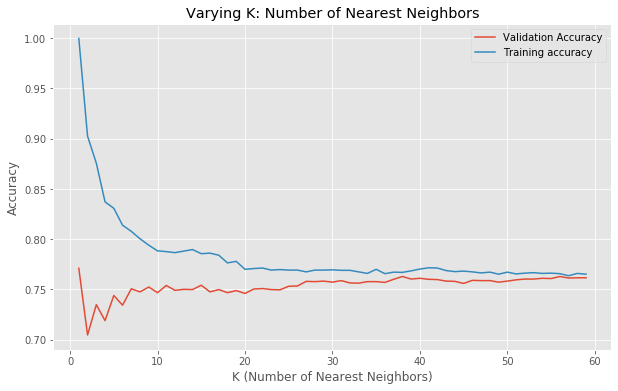

Optimal K:  1


In [28]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 6))
plt.title('Varying K: Number of Nearest Neighbors')
plt.plot(neighbors, validation_accuracy, label='Validation Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('K (Number of Nearest Neighbors)')
plt.ylabel('Accuracy')
plt.show()



# Find the value of "K" that gives max validation accuracy
j = 0
max_val_accuracy = validation_accuracy[j]
max_k = 1

for i in neighbors:
    if(validation_accuracy[j] > max_val_accuracy):
        max_val_accuracy = validation_accuracy[j]
        max_k = i
    j +=1
    
print("Optimal K: ", max_k)

10.Model Selection: Using Scikit-Learn’s GridSearchCVselect the best model.
For the “param_grid” use the following attributes.

{'n_neighbors': [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 37]

,'p': [1, 2, 10, 100]

,'weights': ["uniform", "distance"]}

The “scoring” attribute should be ‘f1’.

Use 10-foldcross-validation: cv = 10

In [29]:
%%time

#warnings.filterwarnings('ignore')

# The param_grid tells Scikit-Learn to evaluate all combinations of the hyperparameter values
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 15, 21, 23, 33, 35, 37],'p': [1, 2, 10, 100]

,'weights': ["uniform", "distance"]}

knn_clf = KNeighborsClassifier()

knn_cv = GridSearchCV(knn_clf, param_grid, scoring='f1', cv=5, verbose=3, n_jobs=-1)
knn_cv.fit(X_train, y_train)


params_optimal_knn = knn_cv.best_params_

print("Best Score: %f" % knn_cv.best_score_)
print("Optimal Hyperparameter Values: ", params_optimal_knn)
print("\n")

Fitting 5 folds for each of 88 candidates, totalling 440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    6.6s


Best Score: 0.870619
Optimal Hyperparameter Values:  {'n_neighbors': 35, 'p': 100, 'weights': 'distance'}


Wall time: 16 s


[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:   15.9s finished


11.Train Scikit-Learn’s KNeighborsClassifiermodel using the optimal hyperparameter values obtained from GridSearchCV.

In [30]:
# With the Mahalanobis distance metric only the brute force algorithm works
#knn = KNeighborsClassifier(weights=?, algorithm='brute', n_neighbors=?, metric = "mahalanobis", metric_params= {'V': ?})

# Minkowski distance metric based optimal model selected via hyperparameter tuning.
# The Minkowski distance based model (i.e., knn_cv) is already trained with the optimal hyperparameter values.
# We can use the optimal model (knn_cv) for prediction.
# Or we can use the optimal hyperparameter values to train a new model, as follows.

knn = KNeighborsClassifier(**params_optimal_knn)

knn.fit(X_train, y_train)

y_train_predicted = knn.predict(X_train)

train_accuracy_knn = np.mean(y_train_predicted == y_train)
print("\nTraining Accuracy: ", train_accuracy_knn)


Training Accuracy:  0.9997447677386422


Prediction vs Probability ( .predict  vs .predict_proba)

In [31]:
data1Index = 0
y_train_predicted_1 = knn.predict(X_train[data1Index].reshape(1, -1))
print("\nPredicted Class for the first data: %d" % y_train_predicted_1)

y_train_predicted_proba_1 = knn.predict_proba(X_train[data1Index].reshape(1, -1))
print("Predicted Class Probabilities for the first data: ", y_train_predicted_proba_1)


Predicted Class for the first data: 0
Predicted Class Probabilities for the first data:  [[1. 0.]]


12.Evaluate your model on the train data using the cross_val_scorefunction and report the average accuracy.

In [32]:
# Scoring Parameter for Classification:
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Note: For a skewed data set "accuracy" might not be a good choice for scoring
scores = cross_val_score(knn, X_train, y_train, scoring='f1', cv=5)
print(scores)

print("F1 Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.88187556 0.8794964  0.85479452 0.87612208 0.86080586]
F1 Score: 0.87 (+/- 0.02)


13.Report the train data performance measures: precision, recall, F1 score and confusion matrix

In [33]:
y_train_pred = cross_val_predict(knn, X_train, y_train, cv=5)

print(confusion_matrix(y_train, y_train_pred))
print(compute_confusion_matrix(y_train,y_train_pred))

[[ 800  485]
 [ 229 2404]]
Predicted    0     1
Actual              
0          274   794
1          546  1522


In [35]:

#compute_F1_score
#compute_precision
#compute_recall

precision = precision_score(y_train, y_train_pred) 
precision2 = compute_precision(y_train, y_train_pred) 
print("Precision = %f" % precision)
print("Precision2 = %f" % precision2)
print('=='*20)
recall = recall_score(y_train, y_train_pred)
recall2 = compute_recall(y_train, y_train_pred)
print("Recall = %f" % recall)
print("Recall2 = %f" % recall2)
print('=='*20)
f1 = f1_score(y_train, y_train_pred)
f12 = compute_F1_score(y_train, y_train_pred)
print("F1 Score = %f" % f1)
print("F12 Score = %f" % f12)

Precision = 0.832122
Precision2 = 0.657168
Recall = 0.913027
Recall2 = 0.735977
F1 Score = 0.870699
F12 Score = 0.694343


In [46]:
# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))


Test Accuracy:  0.7448979591836735

No. of correct predictions (Test): 730/980

Confusion Matrix (Test Data):
 [[174 181]
 [ 69 556]]


14.Generate the ROC curve for the train data.

In [44]:

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=5)[:, 1]


fpr, tpr, thresholds = roc_curve(y_train, y_scores)

print("\nFPR FPR & TPR for Various Threshold Values:")

print("FPR: ", fpr)
print("TPR: ", tpr)
print("\nThresholds: ", thresholds)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.00233463 0.00233463 ... 0.76342412 0.76498054 1.        ]
TPR:  [0.         0.298139   0.31029244 ... 0.99962021 0.99962021 1.        ]

Thresholds:  [2.         1.         0.9770874  ... 0.0994883  0.07812595 0.        ]


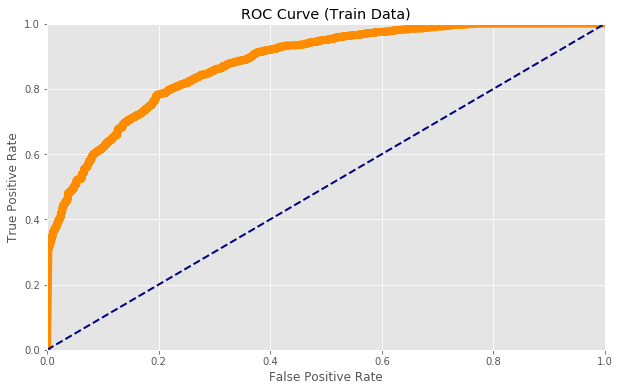

In [45]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, color='darkorange', linewidth=8, label=label) 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.axis([0, 1, 0, 1])
    plt.title('ROC Curve (Train Data)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

15.Report the area under the curve (AUC) score for the ROC curve.

In [48]:
# Area under ROC curve
roc_auc_score(y_train,y_scores)

0.8779376101885528

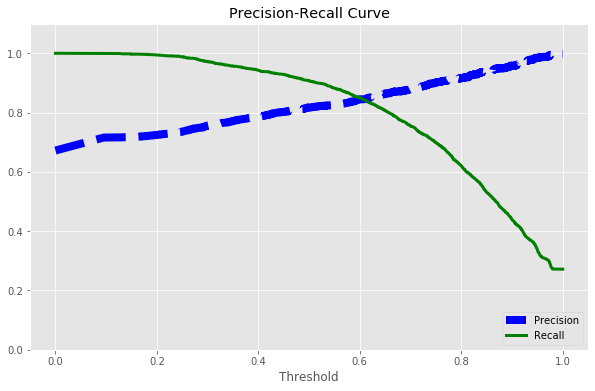

Optimal Threshold:  0.6062744706731654


In [51]:
plt.style.use('ggplot')

# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores = cross_val_predict(knn, X_train, y_train, method="predict_proba", cv=3)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


fig = plt.figure(figsize=(10, 6))
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--",  linewidth=8, label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-",  linewidth=3, label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.title('Precision-Recall Curve')
    #plt.xlim([0, 1])
    plt.ylim([0, 1.1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


threshold_optimal = -1
for i in range(len(precisions)):
    if(precisions[i] == recalls[i]):
        threshold_optimal = thresholds[i]

print("Optimal Threshold: ", threshold_optimal)

ON TEST DATA


In [52]:
# The accuracy of the model
test_accuracy_knn = knn.score(X_test, y_test)
print("\nTest Accuracy: ", test_accuracy_knn)


# No. of Correct Predictions
y_test_predicted = knn.predict(X_test)
print("\nNo. of correct predictions (Test): %d/%d" % (np.sum(y_test_predicted == y_test), len(y_test)))



# Confusion Matrix
print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test, y_test_predicted))


Test Accuracy:  0.7448979591836735

No. of correct predictions (Test): 730/980

Confusion Matrix (Test Data):
 [[174 181]
 [ 69 556]]


In [53]:

precision = precision_score(y_test, y_test_predicted) 
print("Precision = %f" % precision)

recall = recall_score(y_test, y_test_predicted)
print("Recall = %f" % recall)


f1 = f1_score(y_test, y_test_predicted)
print("F1 Score = %f" % f1)

Precision = 0.754410
Recall = 0.889600
F1 Score = 0.816446


In [54]:
# Get the 2nd column of the matrix of predicted probabilities for each data point
#    The 2nd column stores the probalities of the positive class
y_scores_test = cross_val_predict(knn, X_test, y_test, method="predict_proba", cv=3)[:, 1]

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)


print("\nFPR FPR & TPR for Various Threshold Values:")
print("FPR: ", fpr_test)
print("TPR: ", tpr_test)
print("\nThresholds: ", thresholds_test)


FPR FPR & TPR for Various Threshold Values:
FPR:  [0.         0.         0.         0.0028169  0.0028169  0.0028169
 0.0028169  0.0056338  0.0056338  0.0084507  0.0084507  0.01126761
 0.01126761 0.01408451 0.01408451 0.01408451 0.01408451 0.01690141
 0.01690141 0.01971831 0.01971831 0.02253521 0.02253521 0.02535211
 0.02535211 0.02816901 0.02816901 0.03098592 0.03098592 0.03380282
 0.03380282 0.03661972 0.03661972 0.03943662 0.03943662 0.04225352
 0.04225352 0.04507042 0.04507042 0.04788732 0.04788732 0.05070423
 0.05070423 0.05633803 0.05633803 0.05915493 0.05915493 0.06197183
 0.06197183 0.06478873 0.06478873 0.06478873 0.06478873 0.07042254
 0.07042254 0.07323944 0.07323944 0.07605634 0.07605634 0.07887324
 0.07887324 0.08169014 0.08169014 0.08169014 0.08169014 0.08450704
 0.08450704 0.08732394 0.08732394 0.09014085 0.09014085 0.09577465
 0.09577465 0.09859155 0.09859155 0.10140845 0.10140845 0.10422535
 0.10422535 0.10704225 0.10704225 0.10985915 0.10985915 0.11267606
 0.11267606 

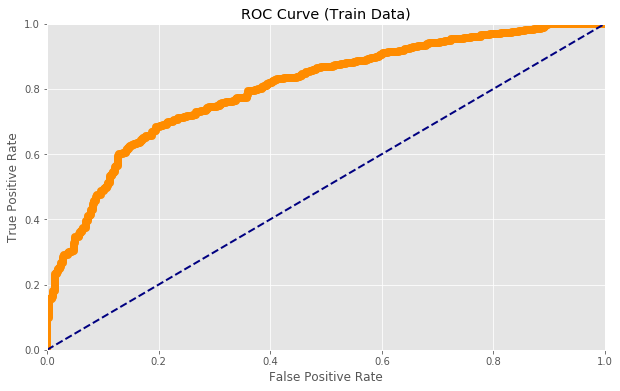

In [55]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
plot_roc_curve(fpr_test, tpr_test)
plt.show()

In [56]:

# Area under ROC curve
roc_auc_score(y_test,y_scores_test)

0.8007030985915493

In [57]:

pd.crosstab(y_test, y_test_predicted, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,174,181,355
1,69,556,625
All,243,737,980


In [58]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58       355
           1       0.75      0.89      0.82       625

    accuracy                           0.74       980
   macro avg       0.74      0.69      0.70       980
weighted avg       0.74      0.74      0.73       980

